### Objective: Perform foundational exploratory data analysis on the full FreshRetailNet dataset.
#### Key Steps:
- Identified unique products (865), stores (898), and ~50,000 product-store combinations.
- Plotted category and store distributions to assess modeling feasibility.
- Helped guide whether to model per-product/store or via aggregation.

In [1]:
from datasets import load_dataset
ds = load_dataset("Dingdong-Inc/FreshRetailNet-50K")


/Users/jhilmitasri/Repositories/MyRepositories/freshretail-demand-forecasting/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
train_df = ds['train'].to_pandas()
eval_df = ds['eval'].to_pandas()

print(train_df.shape)
train_df.head()

(4500000, 19)


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,1.6999,15.48,73.54,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,3.0190,15.08,76.56,1.71
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1,0,2.0942,15.91,76.47,1.73
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.0,1,0,1.5618,16.13,77.40,1.76
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",8,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.0,0,0,3.5386,15.37,78.26,1.25


In [3]:
print("Unique products:", train_df['product_id'].nunique())
print("Unique stores:", train_df['store_id'].nunique())
print("Date range:", train_df['dt'].min(), "→", train_df['dt'].max())

Unique products: 865
Unique stores: 898
Date range: 2024-03-28 → 2024-06-25


In [4]:
sample = train_df[
    (train_df['product_id'] == train_df['product_id'].iloc[0]) &
    (train_df['store_id'] == train_df['store_id'].iloc[0])
].sort_values(by='dt')

sample[['dt', 'hours_sale', 'hours_stock_status', 'discount', 'holiday_flag']].head(24)

,dt,hours_sale,hours_stock_status,discount,holiday_flag
0,2024-03-28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0
1,2024-03-29,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0
2,2024-03-30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1
3,2024-03-31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.000,1
4,2024-04-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.000,0
5,2024-04-02,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0
6,2024-04-03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0
7,2024-04-04,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1
8,2024-04-05,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1
9,2024-04-06,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1


In [5]:
import pandas as pd
import numpy as np

# Step 1: Expand hours_sale and hours_stock_status
def expand_hourly_rows(row):
    rows = []
    for h in range(24):
        rows.append({
            'city_id': row['city_id'],
            'store_id': row['store_id'],
            'product_id': row['product_id'],
            'date': row['dt'],  # this is the day
            'hour': h,
            'hours_sale': row['hours_sale'][h],
            'hours_stock_status': row['hours_stock_status'][h],
            'discount': row['discount'],
            'holiday_flag': row['holiday_flag'],
            'activity_flag': row['activity_flag'],
            'precpt': row['precpt'],
            'avg_temperature': row['avg_temperature'],
            'avg_humidity': row['avg_humidity'],
            'avg_wind_level': row['avg_wind_level']
        })
    return rows

# Step 2: Apply to a subset (e.g., one store-product for speed)
subset = train_df[
    (train_df['product_id'] == train_df['product_id'].iloc[0]) &
    (train_df['store_id'] == train_df['store_id'].iloc[0])
]

expanded_rows = []
for _, row in subset.iterrows():
    expanded_rows.extend(expand_hourly_rows(row))

# Step 3: Create expanded DataFrame
expanded_df = pd.DataFrame(expanded_rows)

# Step 4: Create full datetime for plotting
expanded_df['dt_hour'] = pd.to_datetime(expanded_df['date']) + pd.to_timedelta(expanded_df['hour'], unit='h')

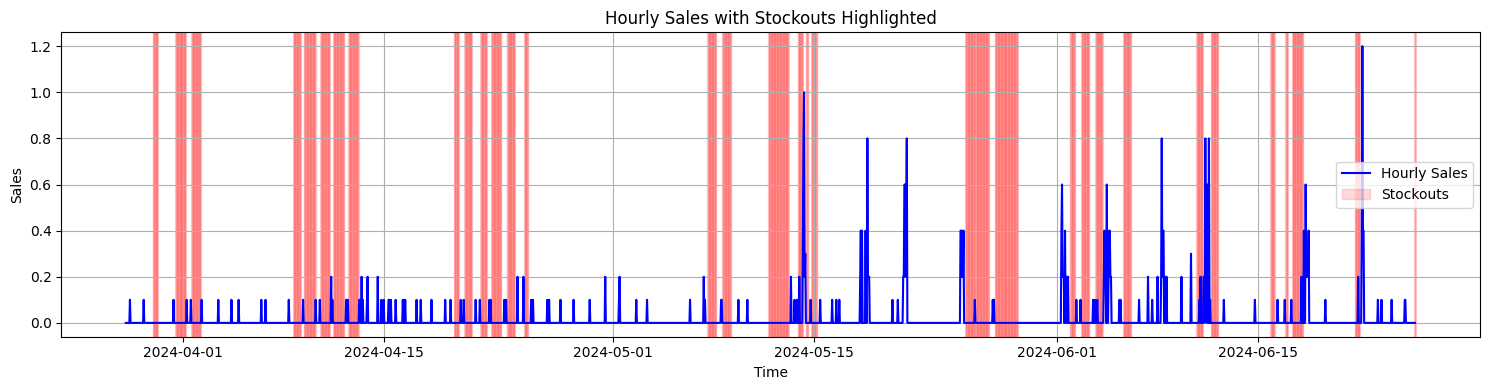

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 4))

# Plot sales
ax1.plot(expanded_df['dt_hour'], expanded_df['hours_sale'], label='Hourly Sales', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Hourly Sales with Stockouts Highlighted')
ax1.grid(True)

# Overlay stockouts using vertical bands
stockouts = expanded_df[expanded_df['hours_stock_status'] == 1]
for _, row in stockouts.iterrows():
    ax1.axvspan(row['dt_hour'], row['dt_hour'] + pd.Timedelta(hours=1), color='red', alpha=0.15)

# Add legend manually
ax1.legend(['Hourly Sales', 'Stockouts'])

plt.tight_layout()
plt.show()

### Hour-of-Day Sales Trend

Sales spike sharply between 6 AM and 9 AM, then taper off.

Interpretation:
- Likely a breakfast/rush-hour effect or early shopping behavior.
- Great insight for stocking early morning or adjusting delivery schedules.

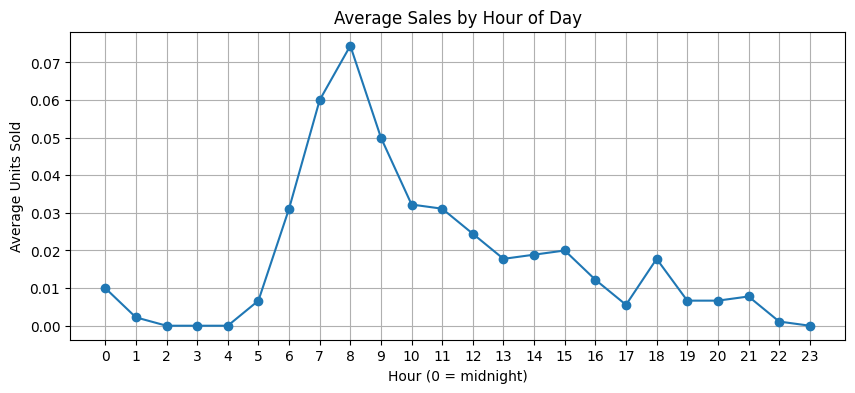

In [7]:
expanded_df['hour'] = expanded_df['dt_hour'].dt.hour

hourly_avg = expanded_df.groupby('hour')['hours_sale'].mean()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Sales by Hour of Day')
plt.xlabel('Hour (0 = midnight)')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

### Discount vs. No Discount

No visible uplift during discounts

/var/folders/8r/40hwn8294818myg3mdy2xp0c0000gn/T/ipykernel_93056/2546737231.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_grp = expanded_df.groupby('discount_bin')['hours_sale'].mean()


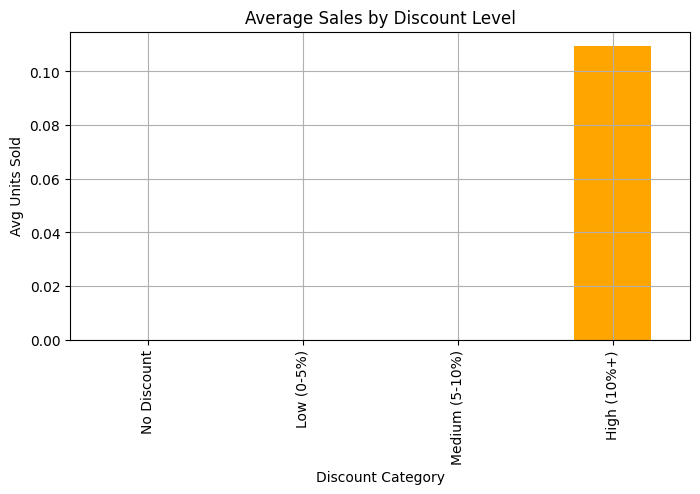

In [8]:
import numpy as np

# Create discount bins (e.g., no discount, low, medium, high)
expanded_df['discount_bin'] = pd.cut(
    expanded_df['discount'],
    bins=[-0.01, 0.0, 0.05, 0.10, 0.50],
    labels=['No Discount', 'Low (0-5%)', 'Medium (5-10%)', 'High (10%+)']
)

# Group by bin and calculate mean sales
discount_grp = expanded_df.groupby('discount_bin')['hours_sale'].mean()

# Plot
discount_grp.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Average Sales by Discount Level')
plt.ylabel('Avg Units Sold')
plt.xlabel('Discount Category')
plt.grid(True)
plt.show()

In [9]:
print(expanded_df['discount'].gt(0).sum(), "rows with discount")

2160 rows with discount


### Sales With Discount (Boxplot)
- The sales distribution under discount is narrow, with very few outliers.
- Suggests that discounting doesn’t create strong spikes in demand for this product-store subset.

<Axes: xlabel='discount', ylabel='hours_sale'>

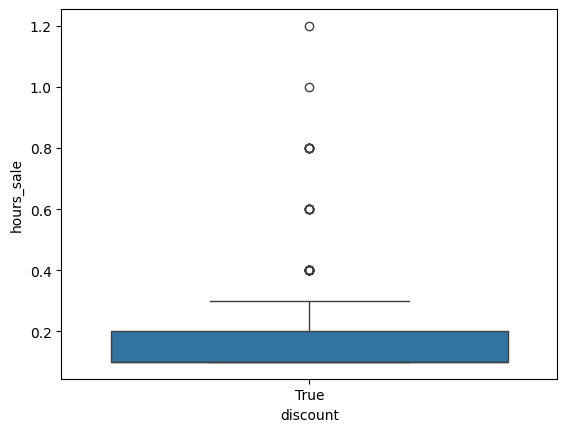

In [10]:
import seaborn as sns

sns.boxplot(
    x=(expanded_df['discount'] > 0),
    y=expanded_df[expanded_df['hours_sale'] > 0]['hours_sale']
)

/var/folders/8r/40hwn8294818myg3mdy2xp0c0000gn/T/ipykernel_93056/1264111761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  morning_grp = morning_sales.groupby('discount_bin')['hours_sale'].mean()


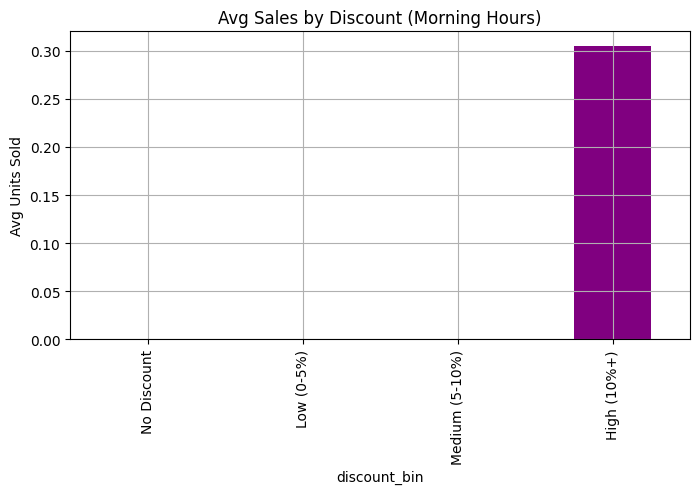

In [11]:
morning_sales = expanded_df[expanded_df['hour'].between(6, 10)]
morning_grp = morning_sales.groupby('discount_bin')['hours_sale'].mean()

morning_grp.plot(kind='bar', color='purple', figsize=(8,4))
plt.title('Avg Sales by Discount (Morning Hours)')
plt.ylabel('Avg Units Sold')
plt.grid(True)
plt.show()

### Stockout Rate by Hour

Very high overnight stockouts, lowest around 6–10 AM, and rising again in the evening.

Interpretation:
- Stores are likely replenished early morning, leading to dips in stockouts
- Inventory might run low late at night
- Useful for stockout-aware modeling and supply planning

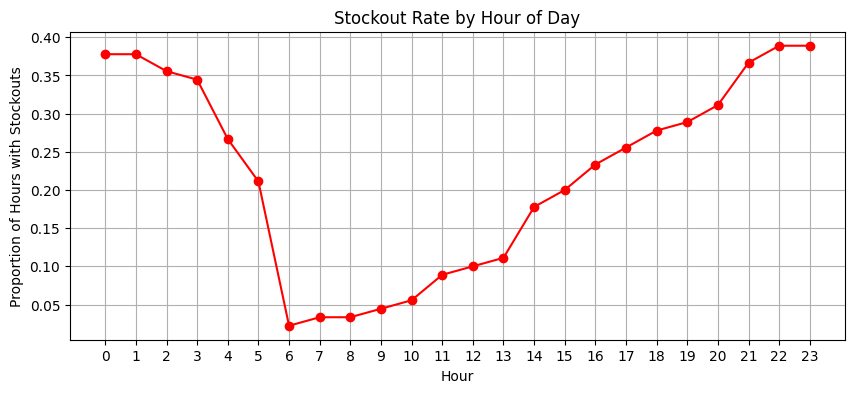

In [12]:
stockout_hourly = expanded_df.groupby('hour')['hours_stock_status'].mean()

plt.figure(figsize=(10, 4))
plt.plot(stockout_hourly.index, stockout_hourly.values, marker='o', color='red')
plt.title('Stockout Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Proportion of Hours with Stockouts')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

### Weekday Sales Pattern

Tuesday and Saturday have the highest sales, while weekdays are relatively low.

Interpretation:
- Tuesday might be a weekly replenishment pattern or promotion day.
- Saturday peaks suggest weekend restocking or family shopping behavior.
- Consider weekday vs weekend model separation.

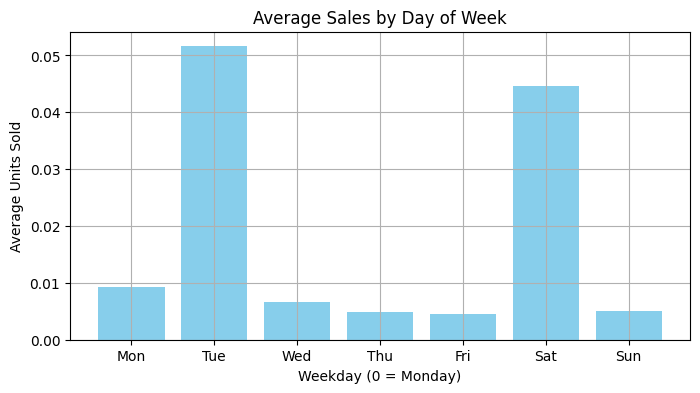

In [13]:
expanded_df['weekday'] = expanded_df['dt_hour'].dt.dayofweek  # 0 = Monday

weekday_avg = expanded_df.groupby('weekday')['hours_sale'].mean()

plt.figure(figsize=(8, 4))
plt.bar(weekday_avg.index, weekday_avg.values, color='skyblue')
plt.title('Average Sales by Day of Week')
plt.xlabel('Weekday (0 = Monday)')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [14]:
n_products = train_df['product_id'].nunique()
n_stores = train_df['store_id'].nunique()
product_store_combos = train_df[['product_id', 'store_id']].drop_duplicates().shape[0]

print(f"🔹 Unique products: {n_products}")
print(f"🔹 Unique stores: {n_stores}")
print(f"🔹 Unique product-store combinations: {product_store_combos}")

🔹 Unique products: 865
🔹 Unique stores: 898
🔹 Unique product-store combinations: 50000
